# Import des modules pour le lecture des données et la création des features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import soundfile as sf


from scipy import signal

import librosa as lr
import librosa.feature as feat
import librosa.display


import os 

In [2]:
path_test = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X__test'
path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X_train'
path_Y = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/Y_train_ofTdMHi.csv'

len(path)

108

Le Format .WAV  qui signifie Waveform Audio File Format, est un format de fichier audio standard pour le stockage de l'audio en format brut, sans compression. Cela signifie qu'il offre une qualité sonore élevée, mais prend plus d'espace de stockage comparé à d'autres formats comme MP3.

# Découverte des données

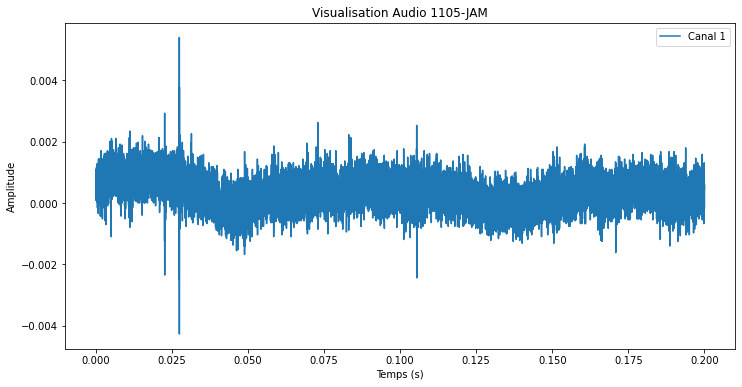

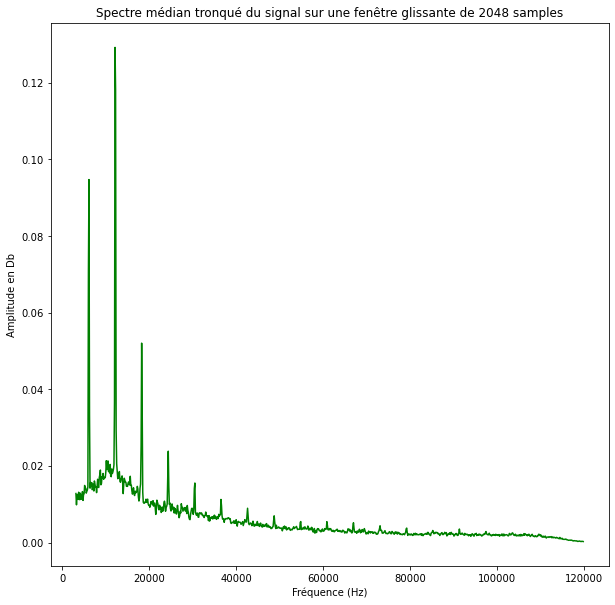

In [3]:
fm = 3e3;fM=120e3;n_fft=2048


def visual_audio(path,display=True,fm = 1e3,fM=1e5,n_fft=1000):
    """
    Cette Fonction récupère la médiane de la valeur absolue de l'amplitude de certaines fréquences sur une Transformée de Fourier discrete roulante
    """

    # Ouvrir le fichier WAV en mode lecture
    if path.endswith(".wav"):
        # Obtenir des informations de base le vecteur audio et la fréquence d'échantillonnage
        audio, sr = sf.read(path) #audio est un array et sr est la freq d'echantillonnage
        n_frames = audio.shape[0] # donne le nb d'echantillon
        duration = n_frames/sr# en sec
        
        #n_fft=1000 # cela permet d'avoir plus de features si on l'augmente, ici on en a 501
        # Pour calculer la STFT qui est TF discrète sur une fenêtre glissante 
        tf_sig = lr.stft(audio, n_fft=n_fft)
        tf_sig = np.abs(tf_sig)

        #### features proposée par le challenge ####
        sos = signal.butter(6, [5000, 100000], 'bandpass', fs=sr, output='sos') # création  d'un filtre passe-bande les fréquences entre 1kHz et 100kHz
        sig = signal.sosfiltfilt(sos, audio) # Applique ce filtre à l'audio de manière bidirectionnelle pour réduire le décalage de phase.
        #Caractéristiques du signal
        rms = feat.rms(y=sig) #Calcule la RMS su signal qui est une mesure de l'amplitude du signal audio.
        sc = feat.spectral_centroid(y=sig, sr=sr) #centroïde spectral, une mesure qui indique où se situe le "centre de masse" du spectre.
        sb = feat.spectral_bandwidth(y=sig,sr=sr) #Calcule la largeur de bande spectrale, qui mesure la largeur du spectre.
        sfs = feat.spectral_flatness(y=sig) #Calcule la platitude spectrale, qui est une mesure de la « planéité » du spectre.

        features = [np.mean(rms), np.std(rms), np.min(rms), np.max(rms),\
                    np.mean(sc), np.std(sc), np.min(sc), np.max(sc),\
                    np.mean(sb), np.std(sb), np.min(sb), np.max(sb),\
                    np.mean(sfs), np.std(sfs), np.min(sfs), np.max(sfs)]

        # Calcul des fréquences pour chaque point de la FFT
        frequences = lr.fft_frequencies(sr=sr, n_fft=n_fft) #Permet de récupérer les fréquences possibles

        # Calcul de la médiane sur l'axe temporel associé à chaque fenêtre + tronquage 
        median = np.median(tf_sig, axis=1)[(fm<frequences) & (frequences<fM)]
        frequences = frequences[(fm<frequences) & (frequences<fM)]

        loc = path[115:-4] #Pour récupérer la localisation de l'audio 

        if display:
            # Affichage du signal
            # Créer le temps (axe x)
            time = np.linspace(1/sr,duration,n_frames)
            plt.figure(figsize=(12, 6))
            plt.plot(time,audio, label="Canal 1")
            plt.title(f"Visualisation Audio {path[110:-4]}")
            plt.xlabel("Temps (s)")
            plt.ylabel("Amplitude")
            plt.legend()
            plt.show()

            # Tracer le spectre avec les fréquences en abscisses
            plt.figure(figsize=(10,10))
            plt.plot(frequences, median,c='g')
            plt.xlabel('Fréquence (Hz)')
            plt.ylabel('Amplitude en Db')
            plt.title(f'Spectre médian tronqué du signal sur une fenêtre glissante de {n_fft} samples')
            plt.show()

        return sr, duration, median, loc, features
    else:
        print("Le fichier suivant n'est pas au format .wav",path)

def recup_freq(path,fm = 1e3,fM=1e5,n_fft=1000):
    """
    Cette fonction permet de récupérer les fréquences 
    """
    sr = sf.read(path)[1] #audio est un array et sr est la freq d'echantillonnage
    
    # récupère les fréquences pour chaque point de la FFT
    frequences = lr.fft_frequencies(sr=sr, n_fft=n_fft)
    frequences = frequences[(fm<frequences) & (frequences<fM)]
    return frequences

sr, duration, median, loc, features = visual_audio(os.path.join(path,'01105-JAM.wav'),display=True,fm = fm,fM=fM,n_fft=n_fft)

frequences = recup_freq(os.path.join(path,'01105-JAM.wav'),fm = fm,fM=fM,n_fft=n_fft)

In [4]:
print(median.shape,frequences.shape)

(935,) (935,)


## Visualisation de plusieurs audios pour voir l'allure 

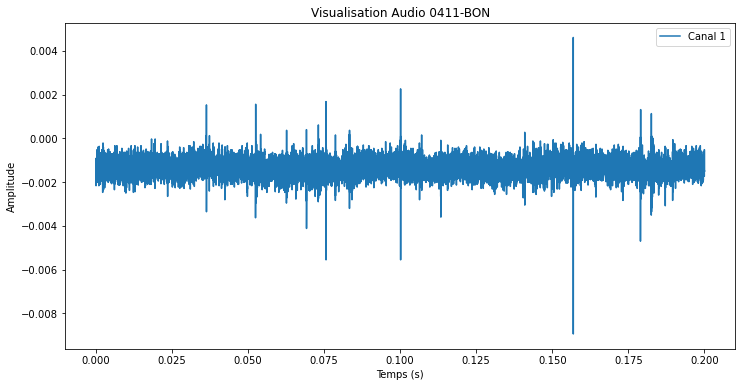

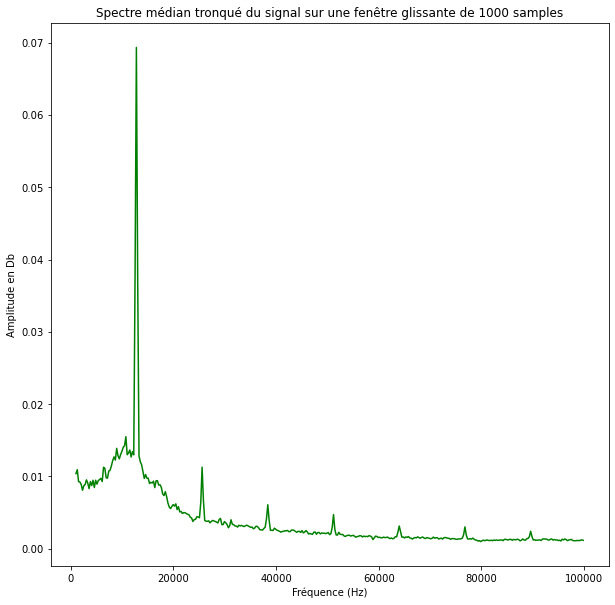

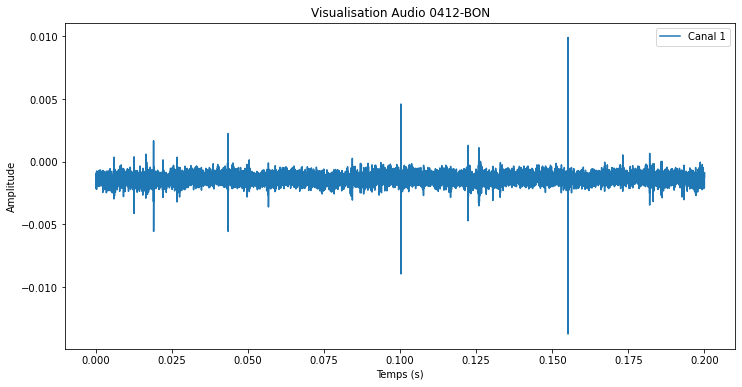

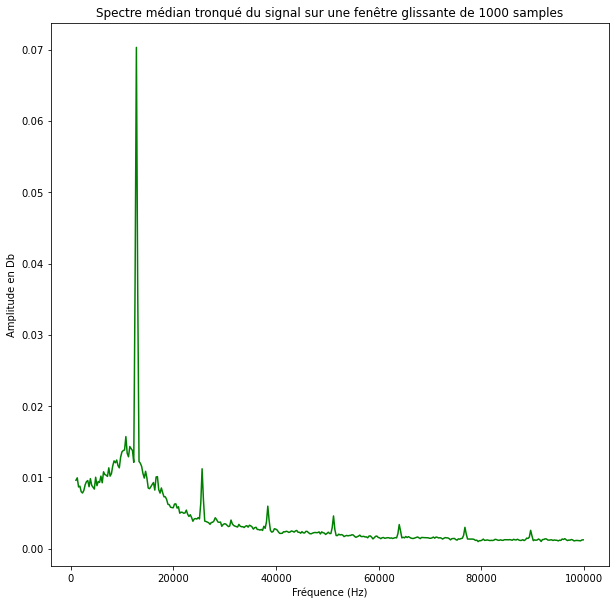

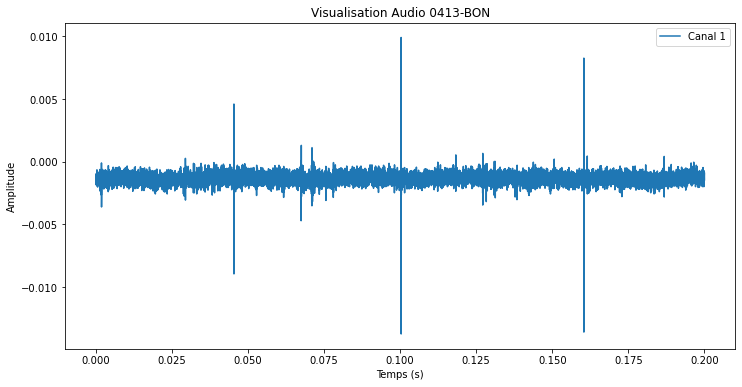

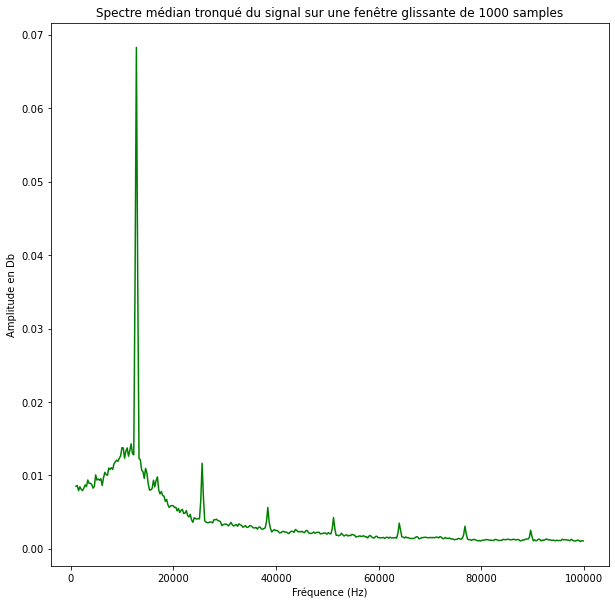

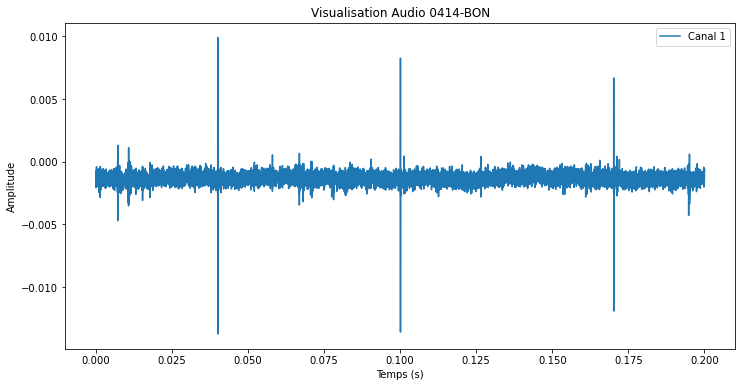

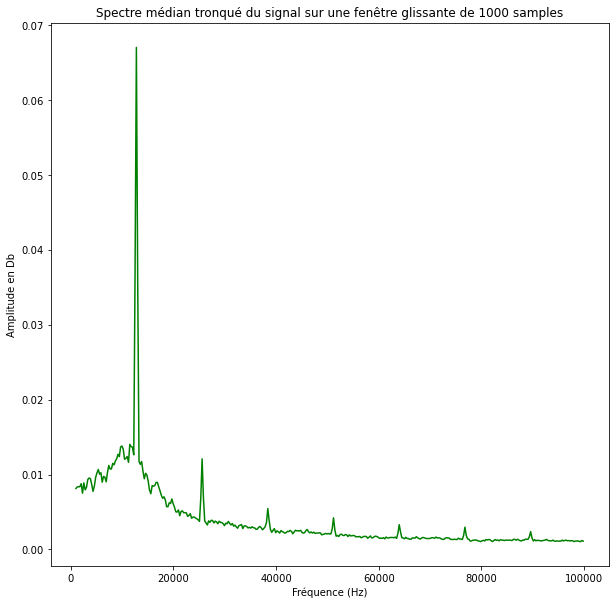

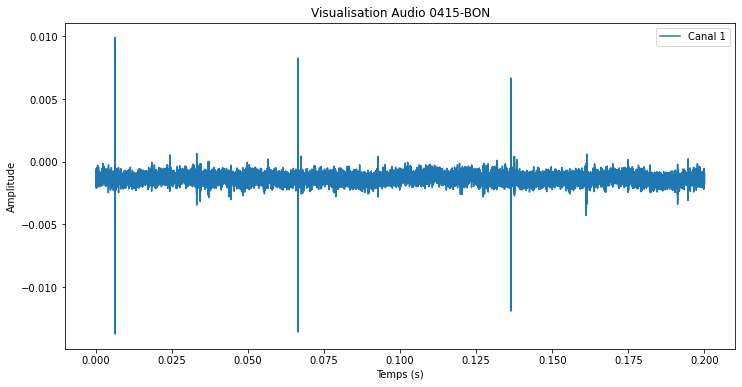

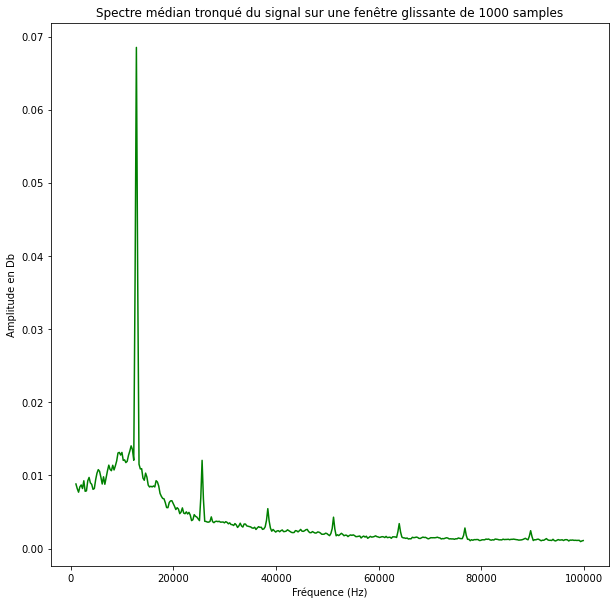

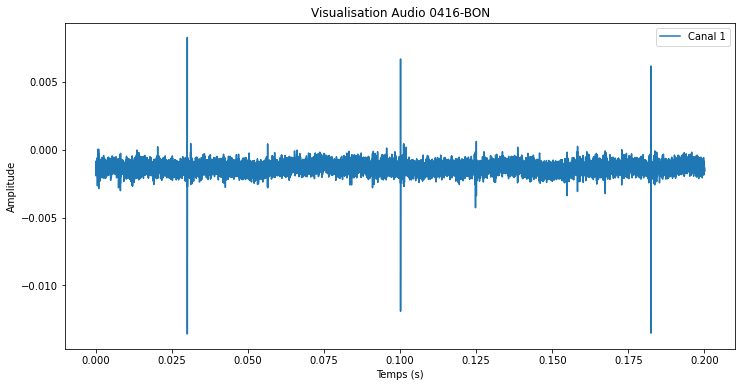

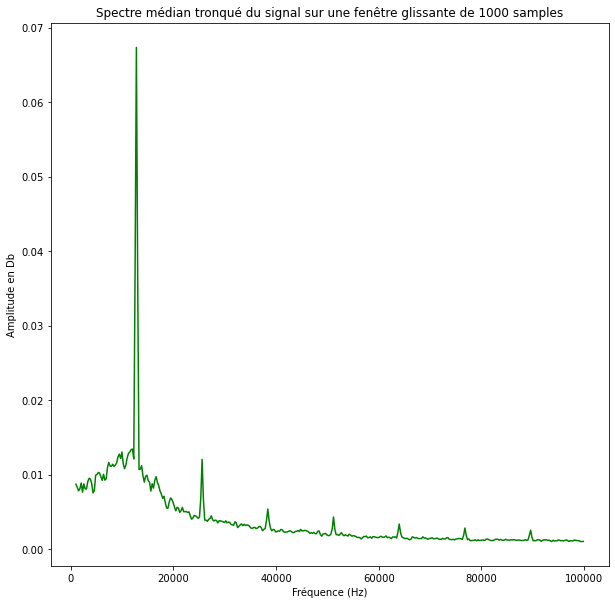

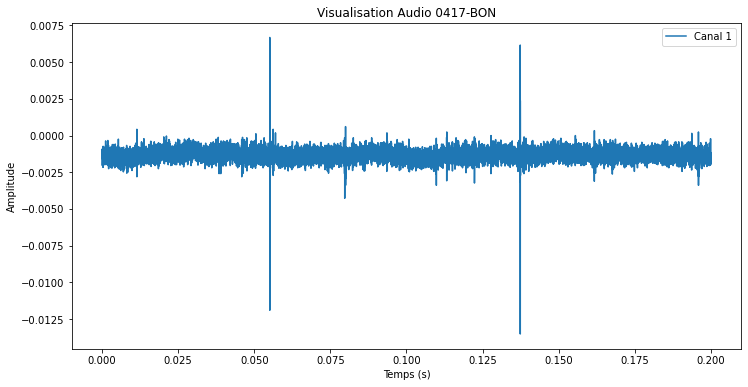

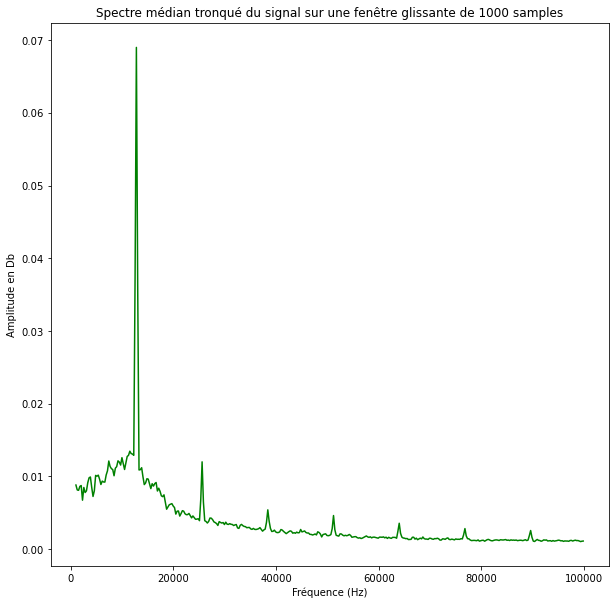

In [11]:
list1 = ["01670-JAM.wav","01671-JAM.wav","01672-JAM.wav","01673-JAM.wav","01674-JAM.wav","01675-JAM.wav","01676-JAM.wav","01677-JAM.wav","01678-JAM.wav","01679-JAM.wav","01680-JAM.wav","01681-JAM.wav","01682-JAM.wav","01683-JAM.wav","01684-JAM.wav"]
list2 = ["00411-BON.wav",\
"00412-BON.wav",\
"00413-BON.wav",\
"00414-BON.wav",\
"00415-BON.wav",\
"00416-BON.wav",\
"00417-BON.wav"]

for audio in list2:
    visual_audio(os.path.join(path,audio))

## tester l'homogénéité des données et récupérer des features intéressantes 

In [5]:
dico1 = {}
for ech in os.listdir(path):
    dico1[f"{ech}"] = visual_audio(os.path.join(path,ech),display=False,fm = fm,fM=fM,n_fft=n_fft)
    if dico1[f"{ech}"] == None:
        dico1.pop(f"{ech}")


Le fichier suivant n'est pas au format .wav /home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X_train/.DS_Store


In [6]:
dicotest = {}
for ech in os.listdir(path_test):
    dicotest[f"{ech}"] = visual_audio(os.path.join(path_test,ech),display=False,fm = fm,fM=fM,n_fft=n_fft)
    if dicotest[f"{ech}"] == None:
        dicotest.pop(f"{ech}")

Le fichier suivant n'est pas au format .wav /home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X__test/.DS_Store
Le fichier suivant n'est pas au format .wav /home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X__test/.zip


In [7]:
for key in dico1.keys():
    c=0
    if (dico1[str(key)][0]!=256000) | (dico1[str(key)][1]!=0.2):
        print(key)
        c+=1
print(f"Il y a {c} fichiers non conformes dans le fichier train ")

for key in dicotest.keys():
    c=0
    if (dicotest[str(key)][0]!=256000) | (dicotest[str(key)][1]!=0.2):
        print(key)
        c+=1
print(f"Il y a {c} fichiers non conformes dans le fichier test")

Il y a 0 fichiers non conformes dans le fichier train 
Il y a 0 fichiers non conformes dans le fichier test


## Ajout de la variable target et création d'un data frame, export un csv


In [7]:
Y_train = pd.read_csv(path_Y)
f = lambda x:x[6:-4]
Y_train['loc'] = Y_train['id'].apply(f)
Y_train

,id,pos_label,loc
0,00000-JAM.wav,0.0,JAM
1,00001-JAM.wav,1.0,JAM
2,00002-JAM.wav,1.0,JAM
3,00003-JAM.wav,1.0,JAM
4,00004-JAM.wav,1.0,JAM
...,...,...,...
23163,23163-StMARTIN.wav,0.0,StMARTIN
23164,23164-StMARTIN.wav,0.0,StMARTIN
23165,23165-StMARTIN.wav,0.0,StMARTIN
23166,23166-StMARTIN.wav,0.0,StMARTIN


## Data train

In [16]:
columns_names = ["id","target"] + list(frequences) + ["rms.mean","rms.std","rms.min","rms.max","sc.mean","sc.std","sc.min","sc.max","sb.mean","sb.std","sb.min","sb.max","sfs.mean","sfs.std","sfs.min","sfs.max"]

data = []
for i in Y_train.index:
    data_i = [ Y_train.iloc[i]["id"],Y_train.iloc[i]["pos_label"]]
    data_i = data_i + list(dico1[Y_train.iloc[i]["id"]][2]) + dico1[Y_train.iloc[i]["id"]][4]
    data.append(data_i)

df = pd.DataFrame(data,columns=columns_names)
    

## Data validation

In [17]:
columns_test_names = ["id"] +list(frequences) + ["rms.mean","rms.std","rms.min","rms.max","sc.mean","sc.std","sc.min","sc.max","sb.mean","sb.std","sb.min","sb.max","sfs.mean","sfs.std","sfs.min","sfs.max"]

data_test = []

for key in dicotest.keys():
    data_i = [key]
    data_i = data_i + list(dicotest[key][2]) + dicotest[key][4]
    data_test.append(data_i)

df_test = pd.DataFrame(data_test,columns=columns_test_names)


In [18]:
df_test.shape

(950, 952)

In [19]:
df.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/features950_data.csv")
df_test.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/test_features950_data.csv")


# Machine learning

## Preprocessing du DataFrame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,f1_score # pour voir l'efficacité globale du modèle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#dataset train
df = pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/features_data.csv",index_col=0)
df.index = range(1,len(df)+1)

#data validation
df_test = pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/test_features_data.csv",index_col='id')
df_test = df_test.iloc[:,1:]

#slpit des données train 
trainset, testset = train_test_split(df, test_size=0.2,random_state=0)

def preprocessing(dataframe):
    """
    Fonction qui retourne les features et la target séparément
    """
    return dataframe.drop('target',axis=1), dataframe.target

X_train,Y_train = preprocessing(trainset)
X_test,Y_test = preprocessing(testset)

## Arbres de decision

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import learning_curve # utile pour voir comment rajouter des données améliore le modèle

### Équilibre des classes 

In [11]:
print(trainset.target.value_counts()/trainset.target.shape[0])
print(testset.target.value_counts()/testset.target.shape[0])

target
0.0    0.589673
1.0    0.410327
Name: count, dtype: float64
target
0.0    0.601856
1.0    0.398144
Name: count, dtype: float64


In [21]:
    
def evaluation_model(model,X_train,X_test,Y_train,Y_test,lc=True):
    """
    Cette fonction permet d'entraîner un modèle du type arbre  et d'en évaluer la performance sur un testset
    """
    
    model.fit(X_train,Y_train)
    
    Y_pred = model.predict(X_test)
    # Prédire les probabilités pour la classe positive
    Y_proba_pred = model.predict_proba(X_test)

    # Calculer les scores TPR (True Positive Rate) et FPR (False Positive Rate)
    fpr, tpr, thresholds = roc_curve(Y_test, Y_proba_pred[:,1])
          
        
    matrix_conf = confusion_matrix(Y_test,Y_pred)
    print(classification_report(Y_test,Y_pred))
    
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix_conf,annot=True,fmt='g')
    plt.title('Matrice de confusion')
    plt.xlabel('Prédictions')
    plt.ylabel('Valeurs réelles')
    plt.show()

    if lc:
        N,train_score,val_score = learning_curve(model,X_train,Y_train,cv=4,train_sizes=np.linspace(0.1,1,10),scoring="f1") 
        #calcule les différents score avec de la cross validation pour des entrainements de plus en plus grand en données 
        # Ici le Val score est un morceau des données train
        plt.figure(figsize=(8,8))
        plt.plot(N,train_score.mean(axis=1),label="train score")
        plt.plot(N,val_score.mean(axis=1),label="train score")
        plt.legend()
        plt.show()

    # Calculer l'aire sous la courbe ROC (AUC)
    roc_auc = auc(fpr, tpr)

    # Tracer la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.6f})') # aire sous la courbe
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC (Receiver Operating Characteristic)')
    plt.legend(loc="lower right")
    plt.show()

## Premier modèle naïf

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      2789
         1.0       0.92      0.92      0.92      1845

    accuracy                           0.94      4634
   macro avg       0.93      0.93      0.93      4634
weighted avg       0.94      0.94      0.94      4634



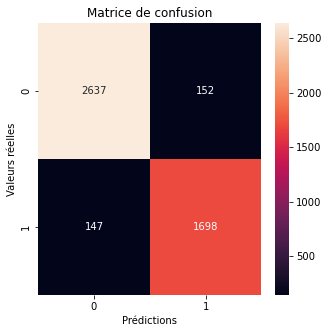

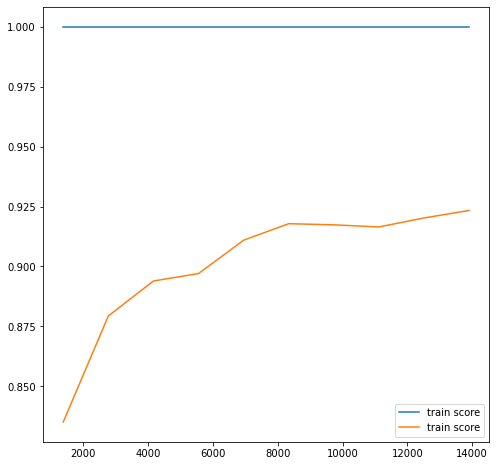

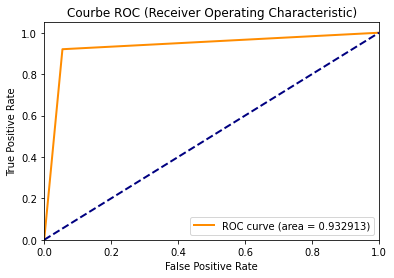

In [22]:
tree1 = DecisionTreeClassifier(random_state=0)

evaluation_model(tree1,X_train,X_test,Y_train,Y_test)


On voit que notre modèle est en overfitting car il est parfait sur les données train mais pas sur les données testé avec la cross validation. On remarque cependant que donner plus de données à notre modèle le fait progresser.  

<AxesSubplot:title={'center':'Importance des variables pour ce modèle'}>

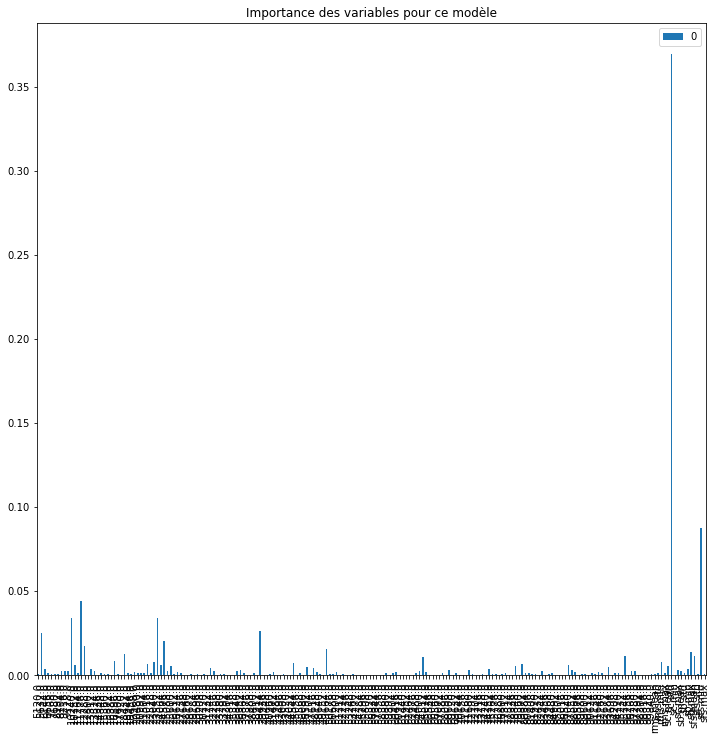

In [54]:
pd.DataFrame(tree1.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,12),title='Importance des variables pour ce modèle')

## Une Random forest 

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2789
         1.0       0.96      0.96      0.96      1845

    accuracy                           0.97      4634
   macro avg       0.97      0.97      0.97      4634
weighted avg       0.97      0.97      0.97      4634



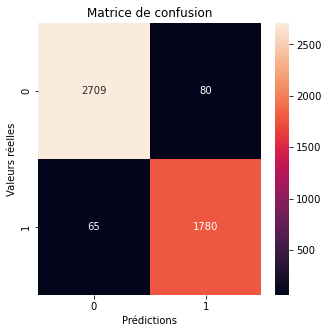

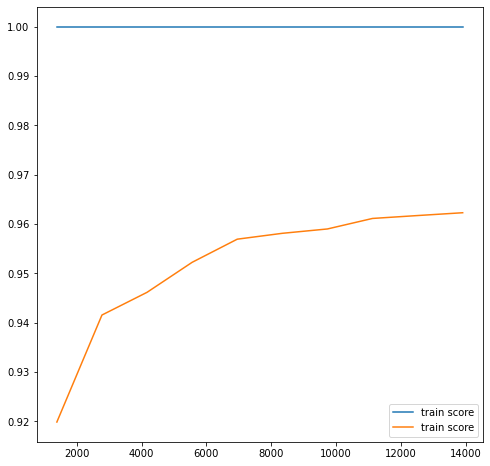

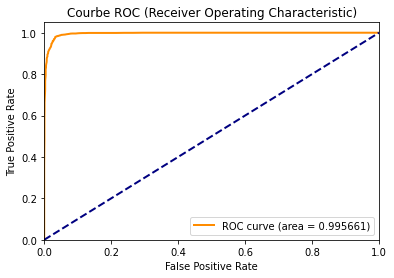

In [55]:
# Créer le modèle DecisionTreeClassifier
forest_tree = RandomForestClassifier(random_state=0)

# Entraîner le modèle
evaluation_model(forest_tree ,X_train,X_test,Y_train,Y_test)



<AxesSubplot:title={'center':'Importance des variables pour ce modèle'}>

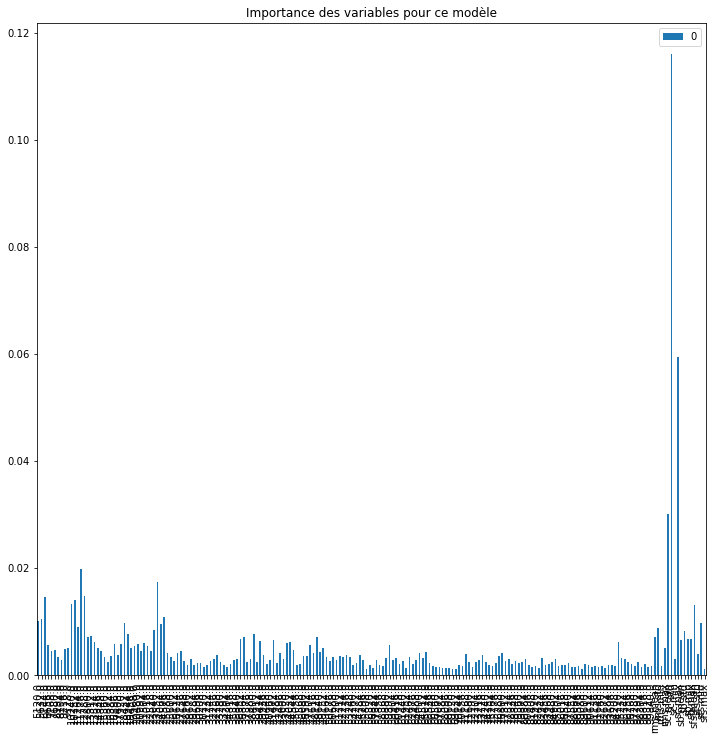

In [56]:
pd.DataFrame(forest_tree.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,12),title='Importance des variables pour ce modèle')

### Soumission1 modèle random forest

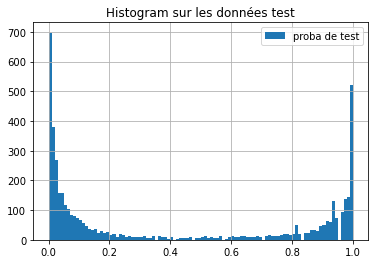

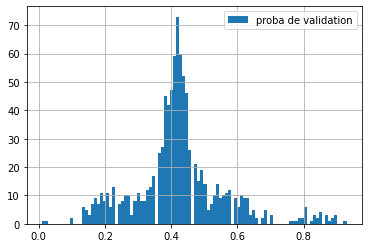

In [57]:

plt.hist(forest_tree.predict_proba(X_test)[:,1],100,density=False,label='proba de test')
plt.grid()
plt.legend()
plt.title("Histogram sur les données test")
plt.show()


plt.hist(forest_tree.predict_proba(df_test)[:,1],100,density=False,label='proba de validation')
plt.grid()
plt.legend()
plt.show()




In [58]:
df_soumission1 = df_test.drop(df_test.columns,axis = 1)
df_soumission1['pos_label'] = forest_tree.predict_proba(df_test)[:,1]
df_soumission1.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/soumission1.csv")

## Make a Pipeline avec de la random Forest et des features polynomiales

In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif #Choisir les meilleurs varialbles avec un test d'Anova
from sklearn.preprocessing import PolynomialFeatures

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      2789
         1.0       0.95      0.94      0.95      1845

    accuracy                           0.96      4634
   macro avg       0.96      0.95      0.96      4634
weighted avg       0.96      0.96      0.96      4634



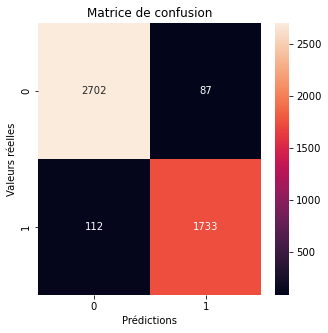

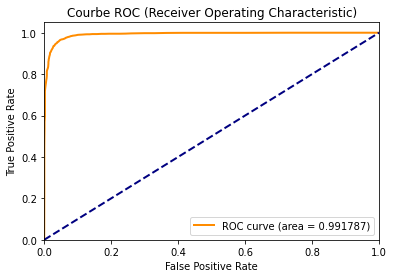

In [60]:
model = make_pipeline(SelectKBest(f_classif,k=25),                      
                      RandomForestClassifier(random_state=0))

# Entraîner le modèle
evaluation_model(model ,X_train,X_test,Y_train,Y_test,lc=False)

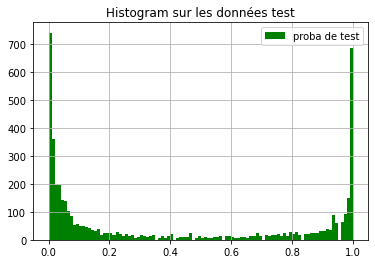

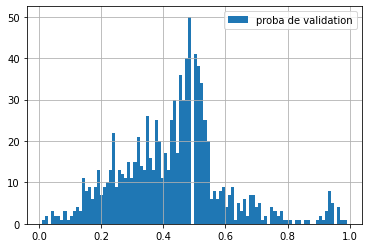

In [61]:

plt.hist(model.predict_proba(X_test)[:,1],100,color='g',density=False,label='proba de test')
plt.grid()
plt.legend()
plt.title("Histogram sur les données test")
plt.show()


plt.hist(model.predict_proba(df_test)[:,1],100,density=False,label='proba de validation')
plt.grid()
plt.legend()
plt.show()



### Soumission2 make a pipeline, ACP et Random forest

In [29]:
df_soumission2 = df_test.drop(df_test.columns,axis = 1)
df_soumission2['pos_label'] = model.predict_proba(df_test)[:,1]
df_soumission2.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/soumission2.csv")

# Deep learning

In [1]:
## Preprocessing du DataFrame

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,f1_score # pour voir l'efficacité globale du modèle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


2024-01-18 16:13:30.590395: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-18 16:13:31.089335: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 16:13:31.089484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 16:13:31.170825: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 16:13:31.359460: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-18 16:13:31.363576: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [30]:
    
def evaluation_model(model,X_train,X_test,Y_train,Y_test, batch_size=20, epochs=80,lr=0.001):
    """
    Cette fonction entraîne une modèle de réseau de neurones de classification binaire pour ensuite l'évaluer sur des données test 
    L'algorithme d'optimisation de l'apprentissage est Adam  
    """
    
    #Pour stopper quand les courbes de coût se croisent
    earlystopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

    #Paramètre du learning rate pour l'algorithme Adam
    adam_optimizer = Adam(learning_rate=lr)

    # Compilateur du modèle avec le nouvel optimiseur
    model.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])
    
    #garder en mémoire l'apprentissage
    history =  model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test,Y_test),callbacks=[earlystopping] )

    # Prédire les probabilités pour la classe positive
    Y_proba_pred = model.predict(X_test)

    # Calculer les scores TPR (True Positive Rate) et FPR (False Positive Rate)
    fpr, tpr, thresholds = roc_curve(Y_test, Y_proba_pred)

    #Trouver le bon indice pour le seuil de décision, au milieu de la courbe Roc
    indice = int(np.floor(len(thresholds)/2))
    print( "voici le seuil médian" ,thresholds[indice-1])

    # Calculer l'aire sous la courbe ROC (AUC)
    roc_auc = auc(fpr, tpr)

    #Prédiction sur le seuil précédent
    Y_pred = Y_proba_pred > thresholds[indice-1]
    
    #Rapport de classification  
    matrix_conf = confusion_matrix(Y_test,Y_pred)
    print(classification_report(Y_test,Y_pred))

    ##Matrice de confusion 
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix_conf,annot=True,fmt='g')
    plt.title('Matrice de confusion')
    plt.xlabel('Prédictions')
    plt.ylabel('Valeurs réelles')
    plt.show()

    ##Historique de l'apprentissage

    #Score
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Accuracy (training data)')
    plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
    plt.title('Accuracy over epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    #Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='loss (training data)')
    plt.plot(history.history['val_loss'], label='loss(validation data)')
    plt.title('Loss over epochs')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # Tracer la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.6f})') # aire sous la courbe
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC (Receiver Operating Characteristic)')
    plt.legend(loc="lower right")
    plt.show()
    


## Un réseau de neurones multicouches

### Standardisation des données

In [4]:
df = pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/features_data.csv",index_col=0)
df.index = range(1,23169)
df_std = df.copy()

df_test = pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/test_features_data.csv",index_col='id')
df_test = df_test.iloc[:,1:]
df_test_std = df_test.copy()

#Standardisation des données
df_std.iloc[:,1:] = (df_std.iloc[:,1:] - df_std.iloc[:,1:].mean(axis=0))/df_std.iloc[:,1:].std(axis=0)
df_test_std = (df_test_std - df_test_std.mean(axis=0) )/ df_test_std.std(axis=0)

trainset, testset = train_test_split(df_std, test_size=0.2,random_state=0)

def preprocessing(dataframe):
    return dataframe.drop('target',axis=1), dataframe.target

X_train,Y_train = preprocessing(trainset)
X_test,Y_test = preprocessing(testset)

In [5]:
X_train

,5120.0,5632.0,6144.0,6656.0,7168.0,7680.0,8192.0,8704.0,9216.0,9728.0,...,sc.min,sc.max,sb.mean,sb.std,sb.min,sb.max,sfs.mean,sfs.std,sfs.min,sfs.max
14714,0.314585,0.567127,0.497398,0.632767,0.635438,0.343430,0.206735,0.359481,0.282247,0.064285,...,0.324120,0.843605,0.586475,0.013715,-0.196981,-0.029097,0.236200,-0.007373,0.136434,-0.052309
22766,-0.279047,-0.150175,-0.141035,-0.103095,-0.158307,0.007323,-0.033879,0.402535,0.387660,0.219651,...,0.942626,-0.466895,0.722880,-0.000505,0.306931,0.393846,0.053122,0.062083,0.790364,0.282435
15055,0.342820,0.606136,0.643781,0.934973,0.784519,0.535906,0.519194,0.742698,0.545135,0.162142,...,-0.068900,1.255371,0.044605,-0.028070,0.096113,0.463660,0.092396,-0.134285,-0.449815,-0.321972
12613,-0.655397,-0.701079,-0.741630,-0.742450,-0.680815,-0.805033,-0.795378,-0.904526,-0.739233,-0.655454,...,0.831983,0.493039,0.440323,-0.235342,-0.258978,-0.593659,0.403702,0.073228,2.196431,0.569836
6286,-0.529578,-0.634100,-0.646681,-0.626867,-0.586255,-0.605662,-0.616391,-0.737111,-0.609664,-0.620415,...,0.642381,-0.468137,0.447916,-0.133331,0.326426,0.382031,-0.010296,-0.051283,0.056569,0.061842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,-0.623771,-0.651961,-0.628589,-0.654749,-0.412814,-0.348451,-0.279954,-0.017026,0.125488,0.583038,...,0.708744,-0.349322,-0.146936,0.396920,-0.144146,-0.542791,0.032807,-0.105303,1.153321,0.021669
19649,2.013543,1.124911,0.435919,0.410726,0.645797,0.264039,0.248527,0.542587,1.674815,2.611551,...,0.049048,-0.795875,-0.358754,-0.176893,-0.127384,0.433623,-0.067038,-0.007011,0.058878,0.262710
9846,2.084921,1.292841,-0.677139,-0.567109,-0.719195,-0.511676,-0.653289,-0.829263,-0.814204,-0.364388,...,-0.103862,1.726724,-0.018995,-0.365531,0.249188,-0.440646,-0.254034,0.072571,-0.265869,0.354832
10800,-0.591112,-0.509493,-0.535144,-0.559369,-0.513102,-0.523211,-0.519523,-0.568357,-0.556322,-0.663701,...,0.511632,2.581054,0.206433,-0.092499,0.001852,-0.476629,-0.048447,0.038749,0.139681,0.178001


## first neuronal network

Epoch 1/140
93/93 [==============================] - 3s 12ms/step - loss: 0.6771 - accuracy: 0.6150 - val_loss: 0.6430 - val_accuracy: 0.6724
Epoch 2/140
93/93 [==============================] - 1s 12ms/step - loss: 0.5902 - accuracy: 0.7258 - val_loss: 0.4851 - val_accuracy: 0.8228
Epoch 3/140
93/93 [==============================] - 1s 14ms/step - loss: 0.4573 - accuracy: 0.8067 - val_loss: 0.3875 - val_accuracy: 0.8498
Epoch 4/140
93/93 [==============================] - 1s 13ms/step - loss: 0.3940 - accuracy: 0.8392 - val_loss: 0.3405 - val_accuracy: 0.8712
Epoch 5/140
93/93 [==============================] - 1s 12ms/step - loss: 0.3624 - accuracy: 0.8543 - val_loss: 0.3190 - val_accuracy: 0.8794
Epoch 6/140
93/93 [==============================] - 1s 12ms/step - loss: 0.3426 - accuracy: 0.8644 - val_loss: 0.3030 - val_accuracy: 0.8863
Epoch 7/140
93/93 [==============================] - 1s 10ms/step - loss: 0.3259 - accuracy: 0.8731 - val_loss: 0.2904 - val_accuracy: 0.8912
Epoch 

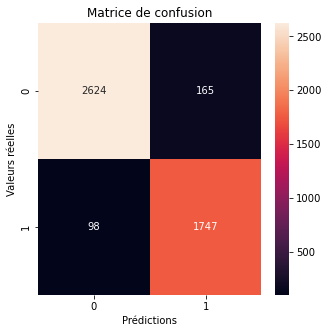

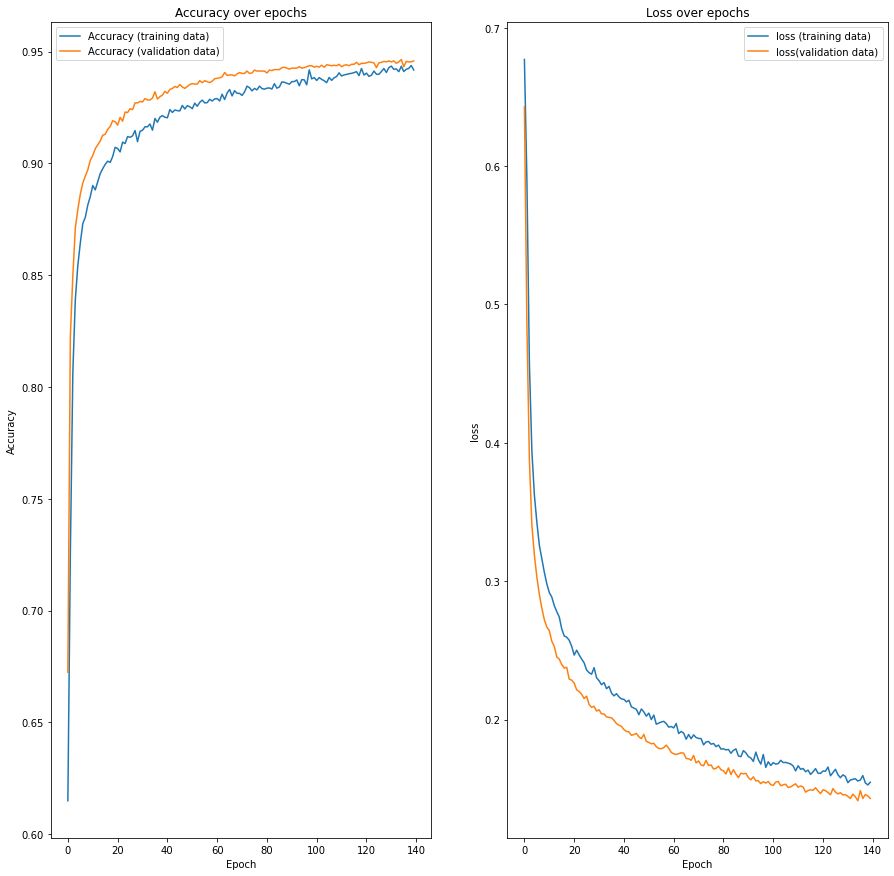

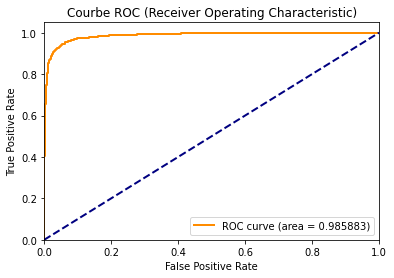

In [35]:

neuronal_network = Sequential()
neuronal_network.add(Dense(21,input_dim=X_train.shape[1], activation='swish'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.25))

neuronal_network.add(Dense(63, activation='swish'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.25))

neuronal_network.add(Dense(189, activation='swish'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.25))

neuronal_network.add(Dense(567, activation='swish'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(189, activation='swish'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.25))

neuronal_network.add(Dense(1, activation='sigmoid'))  # Sortie binaire

evaluation_model(neuronal_network,X_train,X_test,Y_train,Y_test, batch_size=200, epochs=140,lr=0.0001)
#batch_size est le nombre d'individus utilisés pour la descente de gradient lors du Mini Bach
# 1 epoch est égale à N/batch_sige  fois ou on fait tourner l'algo 

  1/145 [..............................] - ETA: 3s145/145 [==============================] - 0s 2ms/step


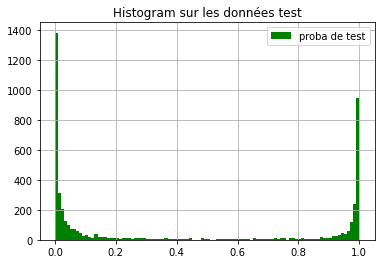

30/30 [==============================] - 0s 2ms/step


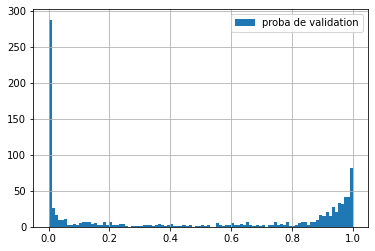

In [36]:
plt.hist(neuronal_network.predict(X_test),100,color='g',density=False,label='proba de test')
plt.grid()
plt.legend()
plt.title("Histogram sur les données test")
plt.show()


plt.hist(neuronal_network.predict(df_test_std),100,density=False,label='proba de validation')
plt.grid()
plt.legend()
plt.show()

In [37]:
df_soumission3 = df_test.drop(df_test.columns,axis = 1)
df_soumission3['pos_label'] = neuronal_network.predict(df_test_std)
df_soumission3.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/soumission3_neuronal1.csv")

30/30 [==============================] - 0s 2ms/step


# Second neuronal network

Epoch 1/100
232/232 [==============================] - 2s 7ms/step - loss: 0.6877 - accuracy: 0.6000 - val_loss: 0.5859 - val_accuracy: 0.8205
Epoch 2/100
232/232 [==============================] - 1s 6ms/step - loss: 0.5595 - accuracy: 0.7236 - val_loss: 0.4049 - val_accuracy: 0.8608
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.4449 - accuracy: 0.8106 - val_loss: 0.3061 - val_accuracy: 0.8874
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3721 - accuracy: 0.8541 - val_loss: 0.2613 - val_accuracy: 0.9059
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3340 - accuracy: 0.8767 - val_loss: 0.2431 - val_accuracy: 0.9130
Epoch 6/100
232/232 [==============================] - 2s 7ms/step - loss: 0.2977 - accuracy: 0.8912 - val_loss: 0.2251 - val_accuracy: 0.9171
Epoch 7/100
232/232 [==============================] - 1s 6ms/step - loss: 0.2877 - accuracy: 0.9017 - val_loss: 0.2098 - val_accuracy: 0.9243

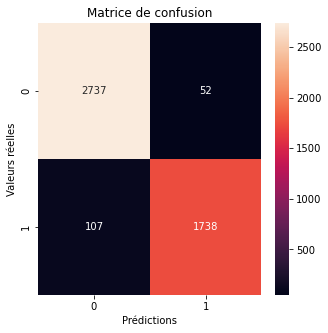

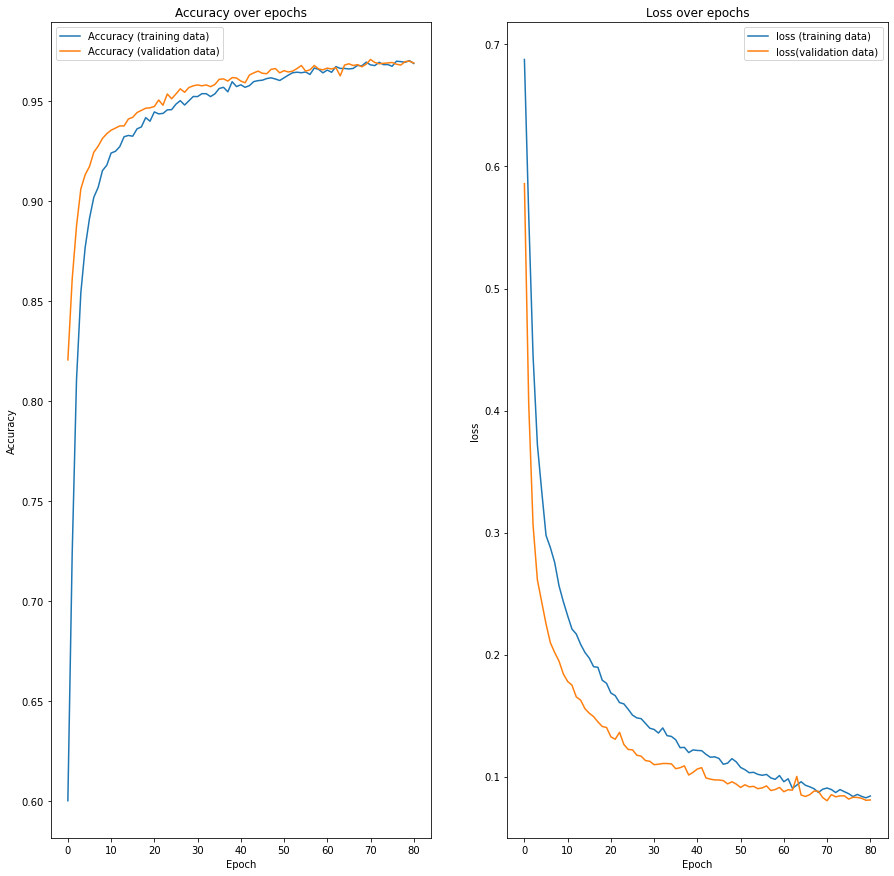

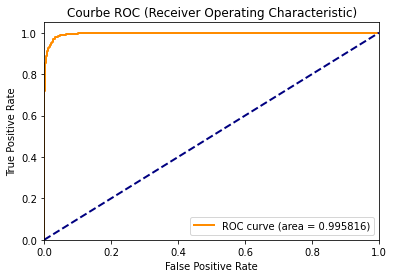

In [50]:
neuronal_network = Sequential()
neuronal_network.add(Dense(686,input_dim=X_train.shape[1], activation='relu'))  
# input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(228, activation='relu'))  
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(76, activation='relu'))  
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(25, activation='relu'))  
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(1, activation='sigmoid'))  # Sortie binaire

evaluation_model(neuronal_network,X_train,X_test,Y_train,Y_test, batch_size=80, epochs=100,lr=0.0001)
#batch_size est le nombre d'individus utilisés pour la descente de gradient lors du Mini Bach
# 1 epoch est égale à N/batch_sige  fois ou on fait tourner l'algo 

145/145 [==============================] - 0s 2ms/step


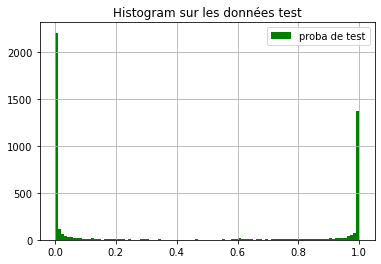

30/30 [==============================] - 0s 2ms/step


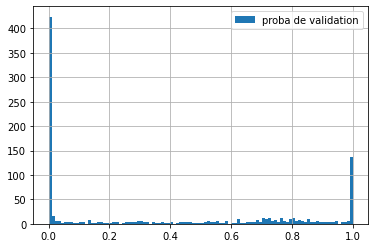

In [51]:
plt.hist(neuronal_network.predict(X_test),100,color='g',density=False,label='proba de test')
plt.grid()
plt.legend()
plt.title("Histogram sur les données test")
plt.show()


plt.hist(neuronal_network.predict(df_test_std),100,density=False,label='proba de validation')
plt.grid()
plt.legend()
plt.show()

In [52]:
df_soumission4 = df_test.drop(df_test.columns,axis = 1)
df_soumission4['pos_label'] = neuronal_network.predict(df_test_std)
df_soumission4.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/soumission4_neuronal1.csv")

30/30 [==============================] - 0s 3ms/step


## Neuronal network session 3 avec plus de features et passage au log 

### Chargement des données avec plus de features et passage au log2

In [29]:
df = pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/features776_data.csv",index_col=0)
df.index = range(1,len(df)+1)
df_log_std = df.copy()

df_test = pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/test_features776_data.csv",index_col='id')
df_test = df_test.iloc[:,1:]
df_test_log_std = df_test.copy()

##Passage au log2 sur les amplitudes de fréquences 
eps = 1e-10
df_log_std.iloc[:,1:len(frequences)+1] = np.log(df_log_std.iloc[:,1:len(frequences)+1]+eps)/np.log(2)
df_test_log_std.iloc[:,0:len(frequences)] = np.log(df_test_log_std.iloc[:,0:len(frequences)]+eps)/np.log(2)

#Standardisation des données
df_log_std.iloc[:,1:] = (df_log_std.iloc[:,1:] - df_log_std.iloc[:,1:].mean(axis=0))/df_log_std.iloc[:,1:].std(axis=0)
df_test_log_std = (df_test_log_std - df_test_log_std.mean(axis=0) )/ df_test_log_std.std(axis=0)

trainset, testset = train_test_split(df_log_std, test_size=0.3,random_state=0)

def preprocessing(dataframe):
    return dataframe.drop('target',axis=1), dataframe.target

X_train,Y_train = preprocessing(trainset)
X_test,Y_test = preprocessing(testset)


In [6]:
neuronal_network = Sequential()
neuronal_network.add(Dense(686,input_dim=X_train.shape[1], activation='relu'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(228, activation='relu'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(76, activation='relu'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(25, activation='relu'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(1, activation='sigmoid'))  # Sortie binaire


In [10]:
tf.keras.utils.plot_model(
    neuronal_network,
    to_file='/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/model1.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
evaluation_model(neuronal_network,X_train,X_test,Y_train,Y_test, batch_size=80, epochs=40,lr=0.0001)
#batch_size est le nombre d'individus utilisés pour la descente de gradient lors du Mini Bach
# 1 epoch est égale à N/batch_sige  fois ou on fait tourner l'algo 
evaluation_model(neuronal_network,X_train,X_test,Y_train,Y_test, batch_size=80, epochs=40,lr=0.00003)
#batch_size est le nombre d'individus utilisés pour la descente de gradient lors du Mini Bach
# 1 epoch est égale à N/batch_sige  fois ou on fait tourner l'algo 

  1/218 [..............................] - ETA: 8s218/218 [==============================] - 1s 3ms/step


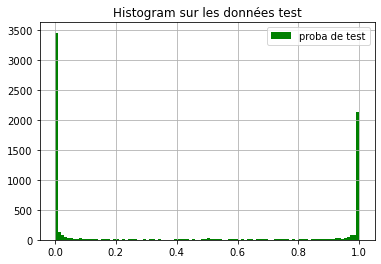

30/30 [==============================] - 0s 2ms/step


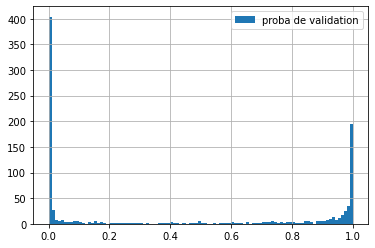

In [51]:
plt.hist(neuronal_network.predict(X_test),100,color='g',density=False,label='proba de test')
plt.grid()
plt.legend()
plt.title("Histogram sur les données test")
plt.show()


plt.hist(neuronal_network.predict(df_test_log_std),100,density=False,label='proba de validation')
plt.grid()
plt.legend()
plt.show()

In [56]:
df_soumission5 = df_test_log_std.drop(df_test.columns,axis = 1)
df_soumission5['pos_label'] = neuronal_network.predict(df_test_log_std)
df_soumission5.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/soumission5_neuronal1.csv") ## Score : 0,9025902305198276 	


30/30 [==============================] - 0s 3ms/step


## Neuronal network session 4 avec plus de features et passage au log 

In [56]:
df = pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/features950_data.csv",index_col=0)
df.index = df.id
df = df.drop(columns='id',axis=1)
df_log_std = df.copy()

df_test = pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/test_features950_data.csv",index_col='id')
df_test = df_test.iloc[:,1:]
df_test_log_std = df_test.copy()

##Passage au log2 sur les amplitudes de fréquences 
eps = 1e-6
df_log_std.iloc[:,1:len(frequences)+1] = np.log(df_log_std.iloc[:,1:len(frequences)+1]+eps)/np.log(2)
df_test_log_std.iloc[:,0:len(frequences)] = np.log(df_test_log_std.iloc[:,0:len(frequences)]+eps)/np.log(2)

#Standardisation des données
df_log_std.iloc[:,1:] = (df_log_std.iloc[:,1:] - df_log_std.iloc[:,1:].mean(axis=0))/df_log_std.iloc[:,1:].std(axis=0)
df_test_log_std = (df_test_log_std - df_test_log_std.mean(axis=0) )/ df_test_log_std.std(axis=0)

trainset, testset = train_test_split(df_log_std, test_size=0.3,random_state=0)

def preprocessing(dataframe):
    return dataframe.drop('target',axis=1), dataframe.target

X_train,Y_train = preprocessing(trainset)
X_test,Y_test = preprocessing(testset)

Epoch 1/40
163/163 [==============================] - 4s 19ms/step - loss: 0.7462 - accuracy: 0.5710 - val_loss: 0.5725 - val_accuracy: 0.7705
Epoch 2/40
163/163 [==============================] - 3s 18ms/step - loss: 0.5874 - accuracy: 0.6817 - val_loss: 0.4546 - val_accuracy: 0.8249
Epoch 3/40
163/163 [==============================] - 3s 18ms/step - loss: 0.4715 - accuracy: 0.7866 - val_loss: 0.3376 - val_accuracy: 0.8748
Epoch 4/40
163/163 [==============================] - 3s 17ms/step - loss: 0.3801 - accuracy: 0.8434 - val_loss: 0.2641 - val_accuracy: 0.9042
Epoch 5/40
163/163 [==============================] - 3s 17ms/step - loss: 0.3171 - accuracy: 0.8771 - val_loss: 0.2186 - val_accuracy: 0.9217
Epoch 6/40
163/163 [==============================] - 3s 17ms/step - loss: 0.2834 - accuracy: 0.8957 - val_loss: 0.2138 - val_accuracy: 0.9164
Epoch 7/40
163/163 [==============================] - 3s 18ms/step - loss: 0.2601 - accuracy: 0.9049 - val_loss: 0.1918 - val_accuracy: 0.9222

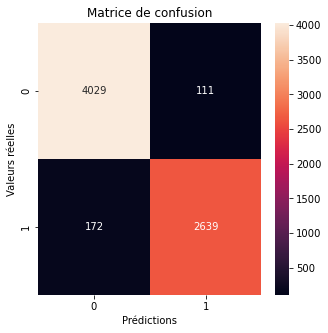

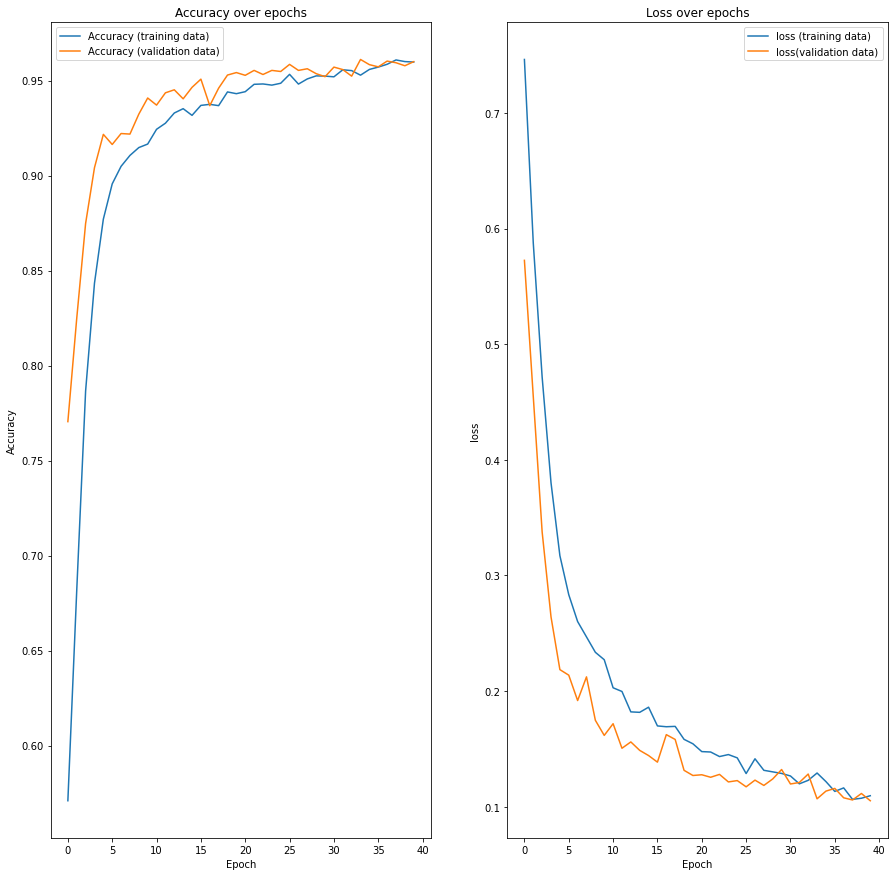

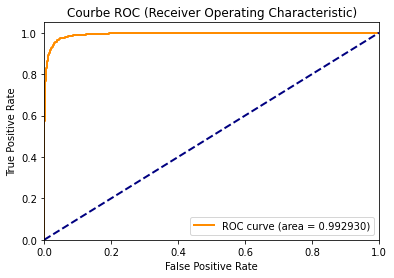

In [46]:
neuronal_network = Sequential()
neuronal_network.add(Dense(700,input_dim=X_train.shape[1], activation='relu'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(500, activation='relu'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(150, activation='relu'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(80, activation='relu'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(1, activation='sigmoid'))  # Sortie binaire

evaluation_model(neuronal_network,X_train,X_test,Y_train,Y_test, batch_size=100, epochs=40,lr=0.0001)
#batch_size est le nombre d'individus utilisés pour la descente de gradient lors du Mini Bach
# 1 epoch est égale à N/batch_sige  fois ou on fait tourner l'algo 


Epoch 1/20
41/41 [==============================] - 2s 37ms/step - loss: 0.0968 - accuracy: 0.9631 - val_loss: 0.1005 - val_accuracy: 0.9627
Epoch 2/20
41/41 [==============================] - 1s 33ms/step - loss: 0.0895 - accuracy: 0.9668 - val_loss: 0.0989 - val_accuracy: 0.9622
Epoch 3/20
41/41 [==============================] - 1s 34ms/step - loss: 0.0914 - accuracy: 0.9674 - val_loss: 0.0987 - val_accuracy: 0.9629
Epoch 4/20
41/41 [==============================] - 1s 33ms/step - loss: 0.0871 - accuracy: 0.9663 - val_loss: 0.0982 - val_accuracy: 0.9633
Epoch 5/20
41/41 [==============================] - 1s 33ms/step - loss: 0.0890 - accuracy: 0.9699 - val_loss: 0.0977 - val_accuracy: 0.9626
Epoch 6/20
41/41 [==============================] - 1s 34ms/step - loss: 0.0851 - accuracy: 0.9694 - val_loss: 0.0978 - val_accuracy: 0.9643
Epoch 7/20
41/41 [==============================] - 1s 34ms/step - loss: 0.0864 - accuracy: 0.9691 - val_loss: 0.0972 - val_accuracy: 0.9640
Epoch 8/20
41

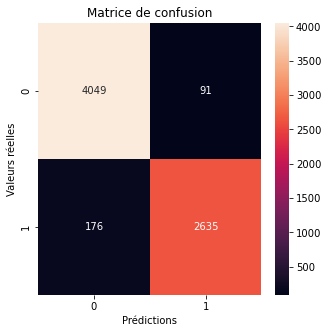

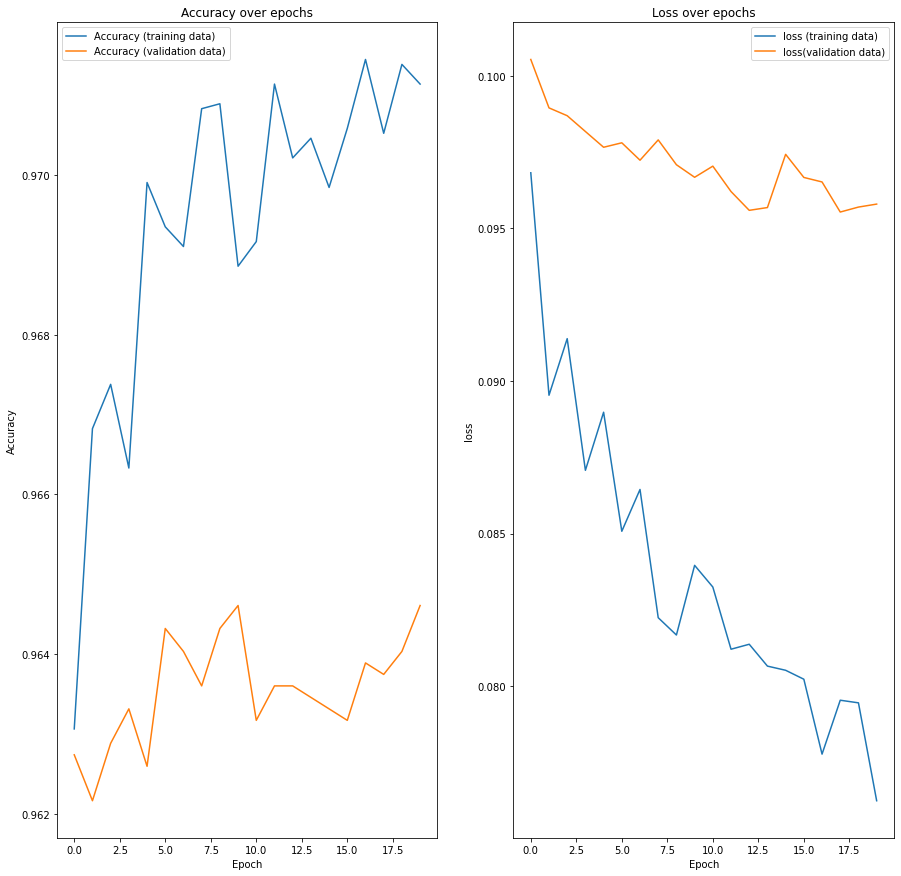

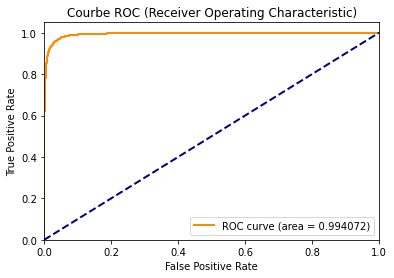

In [47]:
evaluation_model(neuronal_network,X_train,X_test,Y_train,Y_test, batch_size=400, epochs=20,lr=0.00001)
#batch_size est le nombre d'individus utilisés pour la descente de gradient lors du Mini Bach
# 1 epoch est égale à N/batch_sige  fois ou on fait tourner l'algo 

218/218 [==============================] - 1s 3ms/step


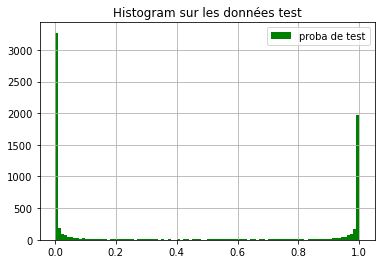

30/30 [==============================] - 0s 4ms/step


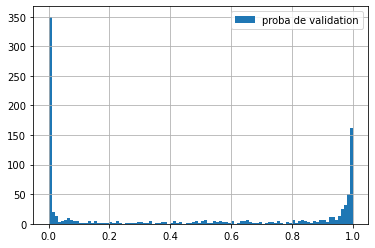

In [57]:
plt.hist(neuronal_network.predict(X_test),100,color='g',density=False,label='proba de test')
plt.grid()
plt.legend()
plt.title("Histogram sur les données test")
plt.show()


plt.hist(neuronal_network.predict(df_test_log_std),100,density=False,label='proba de validation')
plt.grid()
plt.legend()
plt.show()

In [58]:
df_soumission6 = df_test_log_std.drop(df_test.columns,axis = 1)
df_soumission6['pos_label'] = neuronal_network.predict(df_test_log_std)
df_soumission6.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/soumission6_neuronal1.csv")

24/30 [=======================>......] - ETA: 0s

30/30 [==============================] - 0s 4ms/step


In [59]:
import pickle

# Entraînez votre modèle comme vous l'avez fait

# Sauvegardez le modèle dans un fichier
with open('/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/modele_neuronal_MLP.pkl', 'wb') as fichier:
    pickle.dump(neuronal_network, fichier)


In [61]:
# Chargez le modèle à partir du fichier
with open('/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/modele_neuronal_MLP.pkl', 'rb') as fichier:
    modele_charge = pickle.load(fichier)